In [1]:
import caiman as cm 
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf.params import CNMFParams
from caiman.motion_correction import compute_metrics_motion_correction
import numpy as np
import matplotlib.pyplot as plt
import sciebo

In [2]:
#sciebo.download_file_from_sciebo('https://uni-bonn.sciebo.de/s/RR7qj7tklW1rX25', 'data', 'Sue_2x_3000_40_-46.tif')

We can evaluate the performance of motion correction using various metrics such as correlation of each frame with the mean, crispness of the summary image, and residual optical flow.

**Correlation of Each Frame with Mean**

This metric involves calculating the correlation between each registered frame and the mean (or average) image of the registered series. A higher correlation indicates that the frame is well-aligned with the overall dataset, suggesting effective registration. This measure assesses how consistent each frame is with the average image, which ideally represents the scene without temporal variations.


**Crispness of Summary Image**

Crispness refers to the sharpness or clarity of a summary image, which could be a mean or maximum intensity projection of the registered frames. Better-aligned images tend to produce sharper summary images. Larger the value, sharper is the motion corrected image.

**Residual Optical Flow**

Optical flow refers to the pattern of apparent motion of objects, surfaces, or edges in the data. Residual optical flow measures the motion that remains after motion correction has been applied, indicating misalignments or registration errors. Ideally, perfect registration would result in minimal or no residual optical flow, as all parts of the image would be perfectly aligned across frames. However, computing residual optical flow can be computationally intensive because it involves analyzing the motion between every pair of pixels in the aligned frames.

**Example** Let's compute quality metrics for the raw data which can be compared with motion corrected data.

In [10]:
filename = "data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
raw_data_2p = cm.load(filename)

In [11]:
final_size_x, final_size_y = raw_data_2p[0].shape
resize_fact_flow = .2    

_, correlations_orig, flows_orig, norms_orig, crispness_orig = compute_metrics_motion_correction(
    fname=fnames[0], 
    final_size_x=final_size_x, 
    final_size_y=final_size_y, 
    swap_dim=False, 
    winsize=100, 
    play_flow=False, 
    resize_fact_flow=resize_fact_flow
    )


## Rigid Motion Correction

Fill in the blanks below to do a rigid motion correction with border_nan set to 'copy'.

In [5]:
filename = "data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
raw_data_2p = cm.load(filename)
mc_rigid = MotionCorrect(
    fname = fnames,
    pw_rigid = False,
    border_nan='copy'
)
mc_rigid.motion_correct(save_movie=True)

Compute quality metrics for the rigid motion corrected data.

In [6]:
final_size_x, final_size_y = mc_rigid.total_template_rig.shape

winsize = 100
resize_fact_flow = .2    

_, correlations_rig, flows_rig, _, crispness_rig = compute_metrics_motion_correction(
    fname=mc_rigid.fname_tot_rig[0], 
    final_size_x=final_size_x, 
    final_size_y=final_size_y, 
    swap_dim=False, 
    winsize=100, 
    play_flow=False, 
    resize_fact_flow=resize_fact_flow
    )


Compare correlations of raw and rigid data. Fill in the blanks

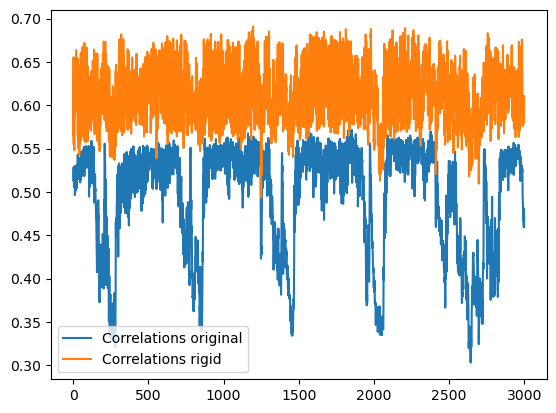

In [12]:
plt.plot(correlations_orig, label='Correlations original')
plt.plot(correlations_rig, label='Correlations rigid')
plt.legend()

Do a rigid with border_nan set to True. In this case, we will have to mind the border pixels which have nan values

In [3]:
filename = "data/Sue_2x_3000_40_-46.tif"
fnames = [filename]
raw_data_2p = cm.load(filename)
mc_rigid_nan = MotionCorrect(
    fname = fnames,
    pw_rigid = False,
    border_nan=True
)
mc_rigid_nan.motion_correct(save_movie=True)

c:\Users\lena_\miniforge3\envs\caiman\lib\site-packages\caiman\motion_correction.py:3076: RuntimeWarning: Mean of empty slice
  new_temp = np.nanmean(mc, 0)


The only difference would be final_size_x and final_size_y to remove the pixels in the border that have nan

In [4]:
bord_px_rig = mc_rigid_nan.border_to_0
final_size_x, final_size_y = np.subtract(mc_rigid_nan.total_template_rig.shape, 2 * bord_px_rig) 

Compute quality metrics for the rigid motion corrected data (mc_rigid_nan).

In [7]:
winsize = 100
resize_fact_flow = .2    

_, correlations_rig_nan, flows_rig_nan, _, crispness_rig_nan = compute_metrics_motion_correction(
    fname=mc_rigid_nan.fname_tot_rig[0], 
    final_size_x=final_size_x, 
    final_size_y=final_size_y, 
    swap_dim=False, 
    winsize=100, 
    play_flow=False, 
    resize_fact_flow=resize_fact_flow
    )

(164, (170, 170))

Compare correlations of raw, rigid (copy), and rigid (nan). Fill in the blanks

In [ ]:
plt.plot(np.array(correlations_rig_nan)-np.array(correlations_rig), label='Residuals copy and nan')
plt.legend()

Let's see what the crispness indicate!

## Non-Rigid Motion Correction

Create a Non-rigid MotionCorrect object mc_els where

```python
    max_shifts=(6, 6),
    strides=(48, 48),
    overlaps=(24, 24),
    max_deviation_rigid=3,
    shifts_opencv=True,
    nonneg_movie=True,
    border_nan='copy',

```

In [ ]:
mc_els = MotionCorrect(
    fnames, 
    #ADD=#ADD,
    #ADD=#ADD,
    #ADD=#ADD,
    #ADD=#ADD,
    #ADD=#ADD,
    #ADD=#ADD,
    #ADD=#ADD,
    pw_rigid=#ADD
)
mc_els.motion_correct(save_movie=True)

Compute quality metrics for the non rigid motion corrected data (mc_els).

Compare correlations of raw and non-rigid data. Fill in the blanks

In [ ]:
plt.plot(np.array(correlations_els)-np.array(correlations_rig), label='Residuals non-rigid and rigid')
plt.legend()

What about the crispness?

Optical Flow (Taken from https://github.com/flatironinstitute/CaImAn/blob/main/demos/notebooks/demo_motion_correction.ipynb)

In [ ]:
fls = [cm.paths.fname_derived_presuffix(mc.fname_tot_els[0], 'metrics', swapsuffix='npz'),
       cm.paths.fname_derived_presuffix(mc.fname_tot_rig[0], 'metrics', swapsuffix='npz'),
       cm.paths.fname_derived_presuffix(mc.fname[0],         'metrics', swapsuffix='npz'),
      ]

plt.figure(figsize = (20,10))
for cnt, fl, metr in zip(range(len(fls)), fls, ['pw_rigid','rigid','raw']):
    with np.load(fl) as ld:
        print(ld.keys())
        print(fl)
        print(str(np.mean(ld['norms'])) + '+/-' + str(np.std(ld['norms'])) +
              ' ; ' + str(ld['smoothness']) + ' ; ' + str(ld['smoothness_corr']))
        
        plt.subplot(len(fls), 3, 1 + 3 * cnt)
        plt.ylabel(metr)
        print(f"Loading data with base {fl[:-12]}")
        try:
            mean_img = np.mean(
            cm.load(fl[:-12] + '.mmap'), 0)[12:-12, 12:-12]
        except:
            try:
                mean_img = np.mean(
                    cm.load(fl[:-12] + '.tif'), 0)[12:-12, 12:-12]
            except:
                mean_img = np.mean(
                    cm.load(fl[:-12] + 'hdf5'), 0)[12:-12, 12:-12]
                    
        lq, hq = np.nanpercentile(mean_img, [.5, 99.5])
        plt.imshow(mean_img, vmin=lq, vmax=hq)
        plt.title('Mean')
        plt.subplot(len(fls), 3, 3 * cnt + 2)
        plt.imshow(ld['img_corr'], vmin=0, vmax=.35)
        plt.title('Corr image')
        plt.subplot(len(fls), 3, 3 * cnt + 3)
        flows = ld['flows']
        plt.imshow(np.mean(
        np.sqrt(flows[:, :, :, 0]**2 + flows[:, :, :, 1]**2), 0), vmin=0, vmax=0.3)
        plt.colorbar()
        plt.title('Mean optical flow');

**References**

1. `data_endoscope.tif` 1-photon microendoscopic data from mouse dorsal striatum [Reference](https://elifesciences.org/articles/28728#s3).
2. `Sue_2x_3000_40_-46.tif` (taken from CaImAn) dataset by Sue Koay and David Tank. 2-photon data from supragranular parietal cortex mouse during a virtual reality task.
3. [Motion Correction: Watch video between 10 to 16 minutes](https://www.youtube.com/watch?v=5APzPRbzUIA)

Notebook inspired from the caiman tutorial notebook: https://github.com/flatironinstitute/CaImAn/blob/main/demos/notebooks/demo_motion_correction.ipynb